# Table of Contents
1. [Problem Description](#Problem-Description)
2. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Model Building and Training](#Model-Building-and-Training)
    - 4.1 [Model Without SMOTE](#Model-Without-SMOTE)
    - 4.2 [Model With SMOTE](#Model-With-SMOTE)
5. [Results Comparison](#Results-Comparison)
    - 5.1 [Performance Without SMOTE](#Performance-Without-SMOTE)
    - 5.2 [Performance With SMOTE](#Performance-With-SMOTE)
6. [Discussion and Conclusion](#Discussion-and-Conclusion)


# Predicting Diabetes Status Using CDC Diabetes Health Indicators

## Table of Contents
1. [Problem Description](#1.Problem-Description)
2. [Data Loading and Preprocessing](#Data-Loading-and-Preprocessing)
3. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-EDA)
4. [Model Building and Training](#4.Model-Building-and-Training)
5. [Results](#Results)
6. [Discussion and Conclusion](#Discussion-and-Conclusion)


---

# 1. Problem Description

Diabetes is a chronic condition that affects millions of individuals worldwide. Early prediction and intervention can significantly improve patient outcomes and reduce healthcare costs. This project aims to build a supervised machine learning model to predict whether an individual has diabetes, is pre-diabetic, or healthy based on various health indicators and lifestyle factors.

### Objectives
- **Predictive Modeling**: Develop a model to classify individuals into diabetic, pre-diabetic, or healthy categories.
- **Feature Importance**: Identify key health indicators that contribute most to diabetes prediction.
- **Model Evaluation**: Assess the performance of the model using appropriate metrics.

### Dataset Overview
The [CDC Diabetes Health Indicators Dataset](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators) contains healthcare statistics and lifestyle survey information about individuals, including demographics, lab test results, and survey responses related to health behaviors.

- **Number of Instances**: 253,680
- **Number of Features**: 21
- **Target Variable**: `Diabetes_binary` (0 = No Diabetes, 1 = Prediabetes or Diabetes)
- **Features Include**:
  - Demographics: Sex, Age, Education Level, Income
  - Health Indicators: ID, Diabetes_binary, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke,
    HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost,
    GenHlth, MentHlth, PhysHlth, DiffWalk



# 2. Data Loading and Preprocessing

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder

from imblearn.over_sampling import SMOTE

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualizations style
sns.set(style="whitegrid")



In [2]:
!pip3 install -U ucimlrepo 

DEPRECATION: beakerx-base 2.2.0 has a non-standard dependency specifier ipywidgets<8pandas,>=7.5.1. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of beakerx-base or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


To begin the analysis, I'll load the CDC Diabetes Health Indicators dataset into the working environment. The dataset is available online, and I'll use Python libraries to download and read the data.

In [3]:
# Load Dataset
data_url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
response = requests.get(data_url)
data = pd.read_csv(StringIO(response.text))

# Display first few rows
data.head()


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4


---

# 3. Exploratory Data Analysis (EDA)

### Understanding the Data

In [4]:
# Display dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   ID                    253680 non-null  int64
 1   Diabetes_binary       253680 non-null  int64
 2   HighBP                253680 non-null  int64
 3   HighChol              253680 non-null  int64
 4   CholCheck             253680 non-null  int64
 5   BMI                   253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   Stroke                253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   PhysActivity          253680 non-null  int64
 10  Fruits                253680 non-null  int64
 11  Veggies               253680 non-null  int64
 12  HvyAlcoholConsump     253680 non-null  int64
 13  AnyHealthcare         253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  GenHlth               253680 non-n

In [5]:
data.columns

Index(['ID', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [6]:
# Summary statistics
data.describe()


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126839.500000,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,73231.252481,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,63419.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,126839.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,190259.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,253679.000000,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


### Checking for Missing Values

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

There are no missing values

### Correlation Analysis

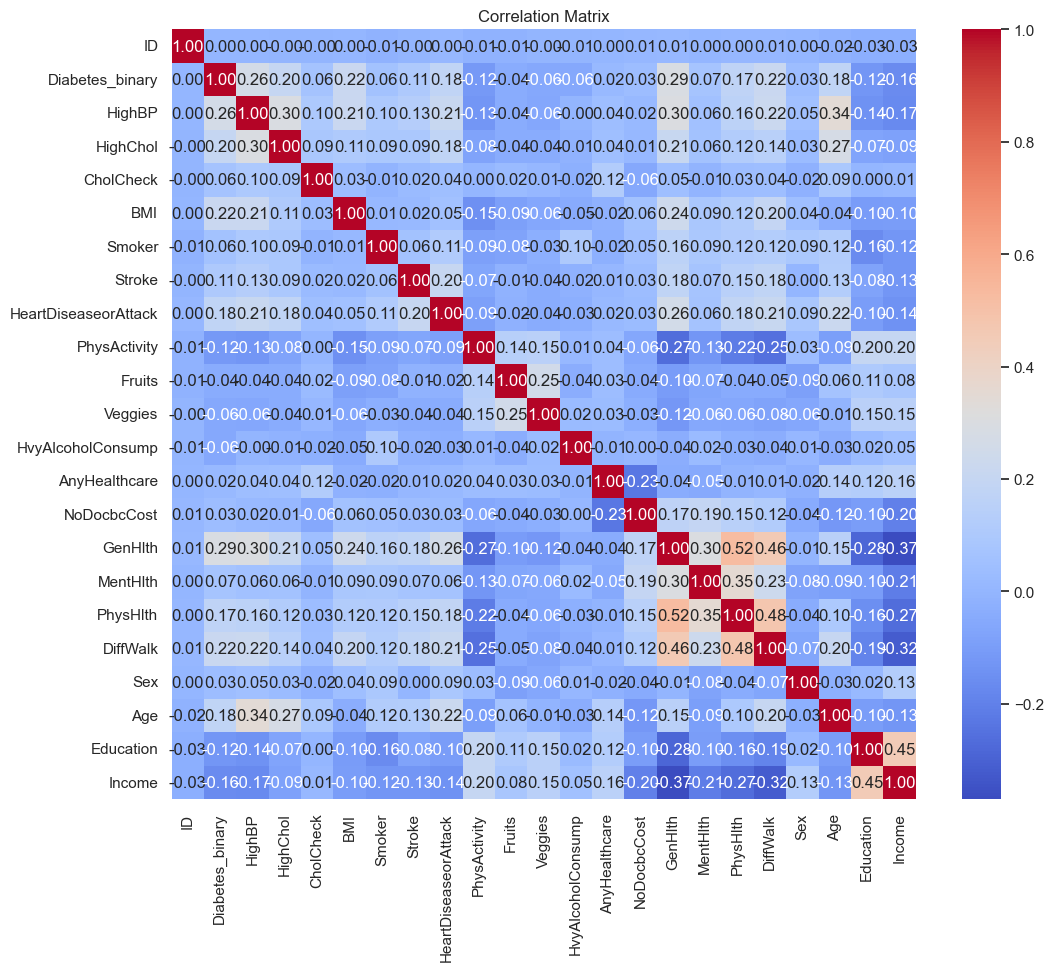

In [8]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### 1. **Target Variable (`Diabetes_binary`) Correlations**
   - **Strong Positive Correlations**:
     - `HighBP` (High Blood Pressure) shows a moderate correlation with `Diabetes_binary` (~0.26). This suggests individuals with high blood pressure are more likely to have diabetes.
     - `HighChol` (High Cholesterol) also exhibits a moderate positive correlation with `Diabetes_binary` (~0.22), indicating a potential link between high cholesterol levels and diabetes.
     - `GenHlth` (General Health) correlates positively (~0.29). Poor general health appears to be a strong indicator of diabetes.

   - **Moderate Negative Correlations**:
     - `PhysActivity` (Physical Activity) has a weak negative correlation (~-0.13). Individuals with higher physical activity levels tend to have a lower likelihood of diabetes.
     - `Income` correlates negatively (~-0.17), suggesting that higher income levels may be associated with a reduced likelihood of diabetes.

#### 2. **Strong Inter-Feature Correlations**
   - **`PhysHlth` (Physical Health) and `GenHlth`**: Correlation is very high (~0.52). This indicates a strong relationship between perceived general health and the physical health days reported by respondents.
   - **`Age` and `HighBP`**: A moderately strong correlation (~0.34) suggests that older individuals are more likely to have high blood pressure.
   - **`Age` and `Diabetes_binary`**: Correlation (~0.18) suggests that age is a factor influencing diabetes, albeit weaker than some health indicators.

#### 3. **Features with Weak or No Correlation**
   - Variables like `Smoker`, `Veggies`, and `Fruits` exhibit minimal or near-zero correlation with `Diabetes_binary`, suggesting these lifestyle factors may have limited direct influence in this dataset.
   - `AnyHealthcare` and `HvyAlcoholConsump` also have weak correlations, indicating healthcare access or heavy alcohol consumption might not strongly predict diabetes in this dataset.

#### 4. **Insights on Multicollinearity**
   - Some features show significant correlations with each other, such as `PhysHlth` and `GenHlth` or `Age` and `HighBP`. These relationships may lead to multicollinearity issues, which could impact model performance if not addressed (e.g., through feature selection or dimensionality reduction).

### Feature Distributions

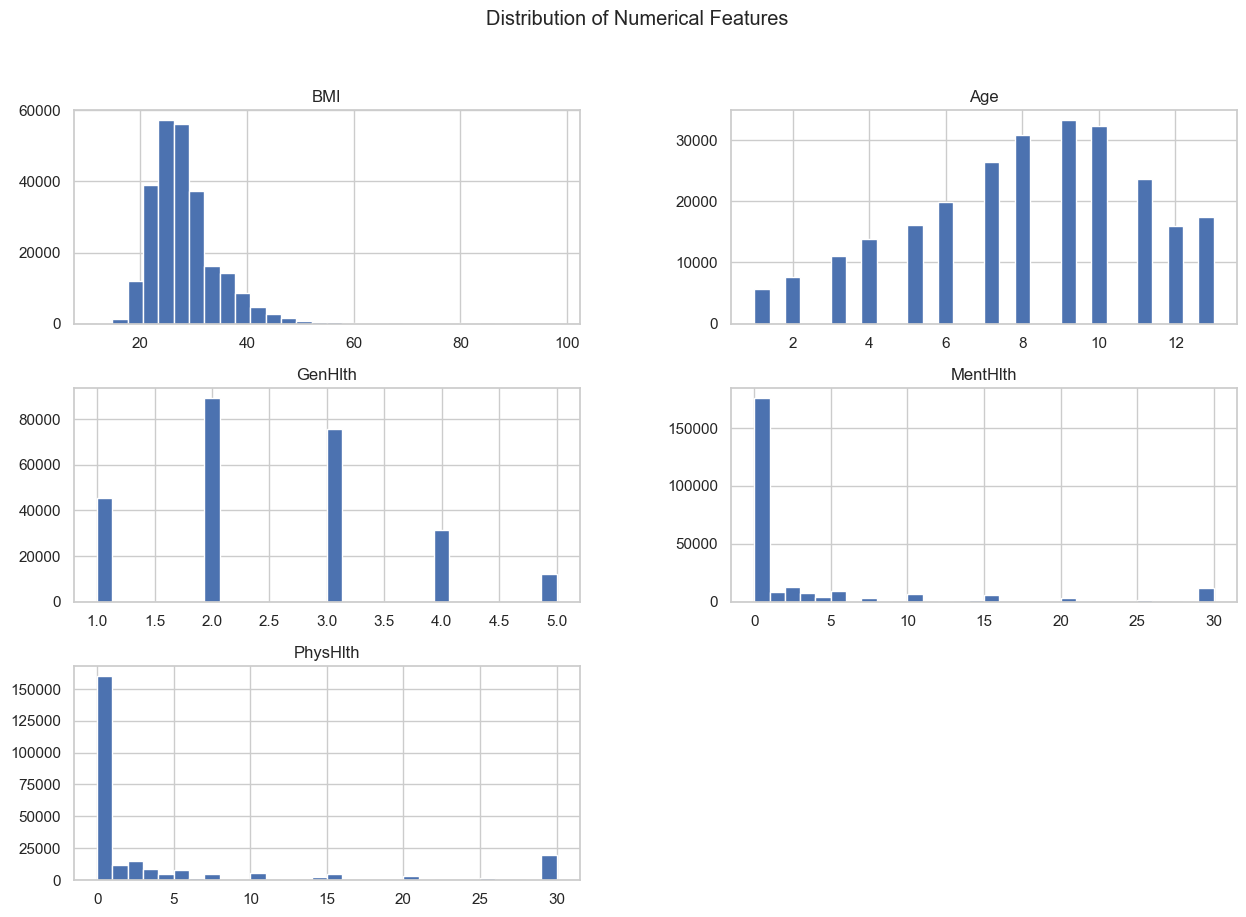

In [9]:
# Distribution of numerical features
numerical_features = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth']

data[numerical_features].hist(bins=30, figsize=(15,10))
plt.suptitle('Distribution of Numerical Features')
plt.show()


From the visualization of the numerical feature distributions, I have the following comments:

#### **BMI (Body Mass Index)**
   - The distribution of BMI is unimodal and slightly right-skewed, with most values concentrated between 20 and 40.
   - There are a few outliers with BMI exceeding 60, which might represent individuals with severe obesity.
   - The skewness suggests that the majority of individuals have a healthy BMI or are moderately overweight.

#### **Age**
   - Age appears to be evenly distributed across the predefined age categories, with slightly higher frequencies in the middle-age groups (values 8–10 in this representation, corresponding to age ranges of 40–59 based on dataset coding).
   - The distribution suggests a good representation of both younger and older individuals, which helps in building a generalized model.
   - Fewer samples in the youngest and oldest age brackets may slightly reduce their predictive power.

#### **GenHlth (General Health Rating)**
   - The distribution of `GenHlth` is skewed toward lower values (better health ratings), with a significant concentration at values 1 and 2.
   - This indicates that most individuals report their health as "good" or "very good," with relatively few reporting "poor" general health (value 5).
   - The skewness highlights a potential imbalance in health ratings, which might influence how this feature correlates with diabetes.

#### **MentHlth (Mental Health)**
   - The distribution of `MentHlth` is heavily right-skewed, with the majority of individuals reporting few or no days of poor mental health in the past month (value near 0).
   - A small proportion of individuals reported significantly worse mental health (values closer to 30 days), representing a minority of the sample.
   - This feature has a long tail and a concentration near 0, which suggests it may require normalization or transformation for effective modeling.

#### **PhysHlth (Physical Health)**
   - Similar to `MentHlth`, the distribution of `PhysHlth` is highly skewed to the right, with most individuals reporting very few days of poor physical health.
   - There is a noticeable concentration at higher values (near 30 days), likely reflecting individuals with chronic health issues or disabilities.
   - This feature also exhibits a long tail, which might require scaling or special handling to ensure its impact is proportional during model training.

---

#### General Insights:
 **Skewness**:
   - `MentHlth` and `PhysHlth` are highly right-skewed, indicating the presence of a large proportion of healthy individuals with occasional outliers representing worse health.

**Diversity in Data**:
   - The `BMI` and `Age` features display broader distributions, which indicate diverse representation across different categories.

**Outliers**:
   - Both `BMI` and `PhysHlth` show extreme values (e.g., BMI > 60 or PhysHlth = 30).



### Categorical Features Analysis

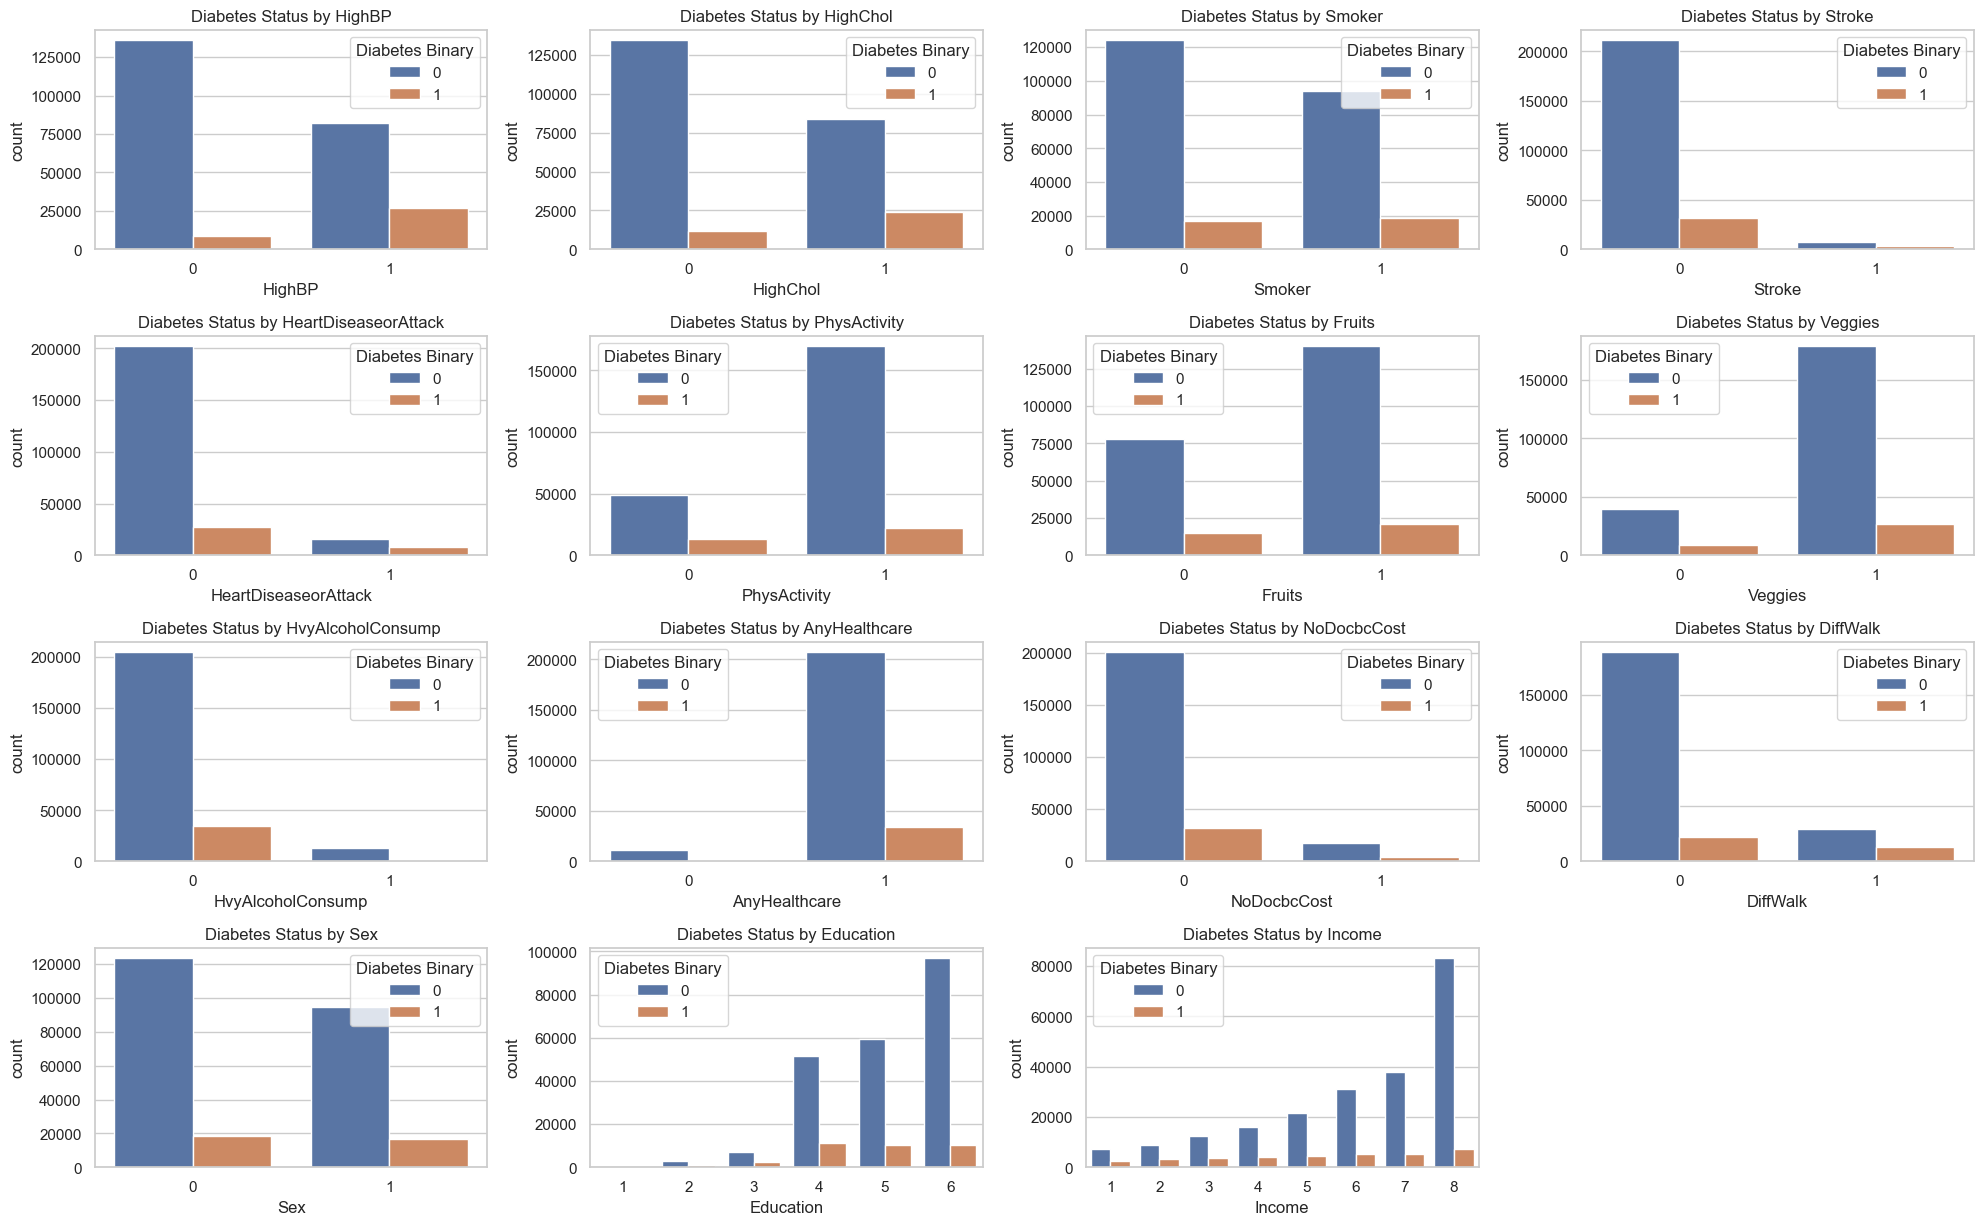

In [10]:
# Categorical features
categorical_features = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 
                        'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                        'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                        'NoDocbcCost', 'DiffWalk', 'Sex', 'Education', 'Income']

plt.figure(figsize=(20, 15))
for idx, feature in enumerate(categorical_features):
    plt.subplot(5, 4, idx+1)
    sns.countplot(x=feature, hue='Diabetes_binary', data=data)
    plt.title(f'Diabetes Status by {feature}')
    plt.legend(title='Diabetes Binary')
plt.tight_layout()
plt.show()


Based on the categorical feature analysis above

---

#### **1. HighBP (High Blood Pressure)**
- A significantly larger proportion of individuals with diabetes (`Diabetes_binary = 1`) have high blood pressure (`HighBP = 1`) compared to those without diabetes.
- This indicates a strong association between high blood pressure and diabetes.

---

#### **2. HighChol (High Cholesterol)**
- A higher proportion of individuals with diabetes have high cholesterol (`HighChol = 1`).

---

#### **3. Smoker**
- There is no clear difference in the proportions of smokers (`Smoker = 1`) between individuals with and without diabetes.
- This suggests that smoking might not be a significant predictor of diabetes in this dataset.

---

#### **4. Stroke**
- A higher proportion of individuals who have experienced a stroke (`Stroke = 1`) also have diabetes.

---

#### **5. HeartDiseaseorAttack**
- A higher proportion of individuals with diabetes have a history of heart disease or attack (`HeartDiseaseorAttack = 1`).

---

#### **6. PhysActivity (Physical Activity)**
- Individuals without diabetes (`Diabetes_binary = 0`) are more likely to report regular physical activity (`PhysActivity = 1`).

---

#### **7. Fruits and Veggies**
- The distributions of fruit consumption (`Fruits = 1`) and vegetable consumption (`Veggies = 1`) show little variation between individuals with and without diabetes.
- This might suggest that these factors, have a limited direct impact on diabetes prediction.

---

#### **8. HvyAlcoholConsump (Heavy Alcohol Consumption)**
- Heavy alcohol consumption (`HvyAlcoholConsump = 1`) is rare in both diabetic and non-diabetic groups.
- This feature may have limited predictive value for this dataset.

---

#### **9. AnyHealthcare**
- Almost everyone reports having healthcare coverage (`AnyHealthcare = 1`), making this feature unlikely to be a strong predictor.

---

#### **10. NoDocbcCost (Couldn’t See a Doctor Due to Cost)**
- Individuals with diabetes are more likely to report not being able to see a doctor due to cost (`NoDocbcCost = 1`).
- This suggests that economic barriers to healthcare access may be associated with diabetes prevalence.

---

#### **11. DiffWalk (Difficulty Walking)**
- A large proportion of individuals with diabetes report difficulty walking or climbing stairs (`DiffWalk = 1`).
- This feature shows a clear association with diabetes.

---

#### **12. Sex**
- There is no significant difference in diabetes prevalence between males (`Sex = 1`) and females (`Sex = 0`).

---

#### **13. Education**
- Lower education levels (e.g., `Education = 1` or `2`) are more common among individuals with diabetes compared to higher education levels.
- This highlights a potential socioeconomic factor in diabetes prevalence.

---

#### **14. Income**
- Individuals with higher income levels (`Income = 6`, `7`, `8`) are less likely to have diabetes compared to those with lower income.
- This supports the idea that economic factors and access to resources may influence diabetes risk.

---

#### General Observations:
- **Strong Predictors**:
  - `HighBP`, `HighChol`, `DiffWalk`, `HeartDiseaseorAttack`, and `PhysActivity` show clear differences between the diabetic and non-diabetic groups, making them likely strong predictors.
- **Weak Predictors**:
  - Features like `Smoker`, `Fruits`, `Veggies`, and `HvyAlcoholConsump` exhibit little variation between the groups and may have limited predictive power.
- **Socioeconomic Factors**:
  - Features like `Education`, `Income`, and `NoDocbcCost` suggest that socioeconomic status plays a role in diabetes prevalence.


### Distribution of Target Variable

0    218334
1     35346
Name: Diabetes_binary, dtype: int64


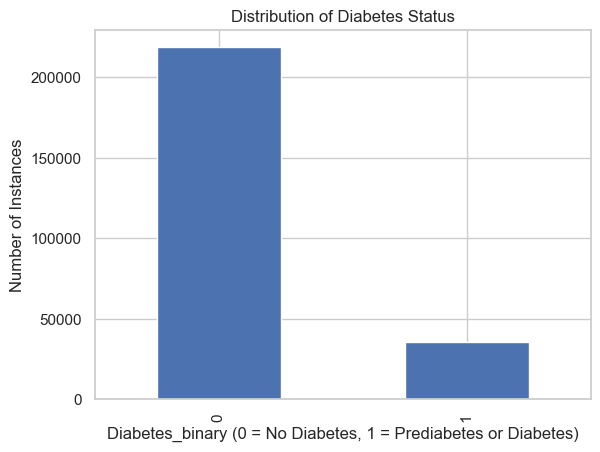

In [11]:
# Check the distribution of the target variable
import matplotlib.pyplot as plt

class_counts = data['Diabetes_binary'].value_counts()
print(class_counts)

# Plot the distribution
class_counts.plot(kind='bar')
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes_binary (0 = No Diabetes, 1 = Prediabetes or Diabetes)')
plt.ylabel('Number of Instances')
plt.show()


There is a significant class imbalance in your dataset, with the majority class (No Diabetes) greatly outnumbering the minority class (Prediabetes or Diabetes). This imbalance can negatively impact the performance of your machine learning models, particularly in accurately predicting the minority class.


To address class imbalance I will be using a resampling technique of oversampling the minority class called Synthetic Minority Over-sampling Technique (SMOTE) which generates synthetic examples of the minority class by interpolating between existing minority instances. Also helps balance the dataset without simply duplicating existing samples.

The class imbalance we be addressed in the next section.

---

### Data Preprocessing

In [14]:
# Drop ID column as it's not useful for modeling
data.drop('ID', axis=1, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for column in categorical_features:
    data[column] = label_encoder.fit_transform(data[column])

# Feature and Target Separation
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']




In the above snippet the 'ID' column is a unique identifier for each record in the dataset. Since it doesn't contain predictive information relevant to diabetes status it is being dropped.

The categorical variables need to be converted into numerical form which is done above.

Finally the snippet separates the data into features (x) and target (y) 

### Train-Test Split

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 202944 samples
Testing set size: 50736 samples


### Handling Class Imbalance

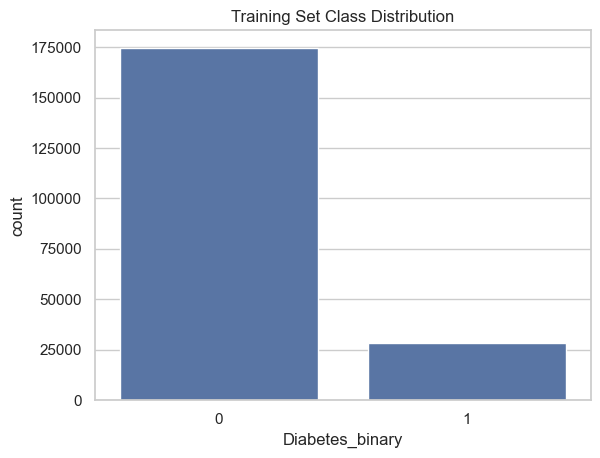

In [18]:
# Check class distribution
sns.countplot(x=y_train)
plt.title('Training Set Class Distribution')
plt.show()



### SMOTE

In [19]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Original training set shape:")
print(y_train.value_counts())
print("\nResampled training set shape:")
print(y_train_resampled.value_counts())

Original training set shape:
0    174667
1     28277
Name: Diabetes_binary, dtype: int64

Resampled training set shape:
0    174667
1    174667
Name: Diabetes_binary, dtype: int64


Because of the class imbalanced mentioned earlier, SMOTE is applied above.

### Model Selection and Training

In [20]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train_resampled, y_train_resampled)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Final Model Training

In [21]:
# Best estimator from Grid Search
best_rf = grid_search.best_estimator_

# Train the model
best_rf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(n_estimators=200, random_state=42)

Because I am using Random Forest Classifier theres no need for feature scaling.

---

# 5. Results

### Model Performance on Test Set

In [22]:
# Predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87     43667
           1       0.32      0.48      0.39      7069

    accuracy                           0.79     50736
   macro avg       0.62      0.66      0.63     50736
weighted avg       0.83      0.79      0.80     50736



**Accuracy:**
The Test Set Accuracy is 0.79, indicating that the Random Forest model correctly classified approximately 79% of the instances in the test set. 

**Class-wise Performance:**
   - **Class 0 (No Diabetes):**
     - **Precision:** 0.91
       - Out of all instances predicted as Class 0, 91% were correct.
     - **Recall:** 0.84
       - The model correctly identified 84% of all actual Class 0 instances.
     - **F1-Score:** 0.87
       - A balanced measure of precision and recall for Class 0 is relatively high.
   - **Class 1 (Diabetes or Prediabetes):**
     - **Precision:** 0.32
       - Out of all instances predicted as Class 1, only 32% were correct.
     - **Recall:** 0.48
       - The model correctly identified 48% of all actual Class 1 instances.
     - **F1-Score:** 0.39
       - A much lower score for Class 1, indicating poorer performance in predicting the minority class.

**Macro and Weighted Averages:**
   - **Macro Average:**
     - Precision, recall, and F1-score are averaged equally across both classes, regardless of class size.
     - Reflects poor performance due to the low scores for Class 1.
   - **Weighted Average:**
     - These averages are weighted by the support (number of instances in each class).
     - Since Class 0 has much higher support, the weighted averages are skewed toward its higher performance.

### **Analysis of Results:**

- **Good Performance on Class 0 (Majority Class):**
  - The model performs well at identifying the majority class (`No Diabetes`) due to its dominance in the dataset.

- **Poor Performance on Class 1 (Minority Class):**
  - Precision and recall for Class 1 are low, indicating that the model struggles to correctly identify instances of `Diabetes or Prediabetes`.
  - This is likely due to the class imbalance in the dataset, as the model is biased toward the majority class (Class 0).

- **Class Imbalance Effect:**
  - The imbalanced dataset leads to the model focusing on the majority class at the expense of the minority class.
  - While the overall accuracy looks acceptable, the poor recall for the minority class means that many diabetic cases are being missed.




### Confusion Matrix

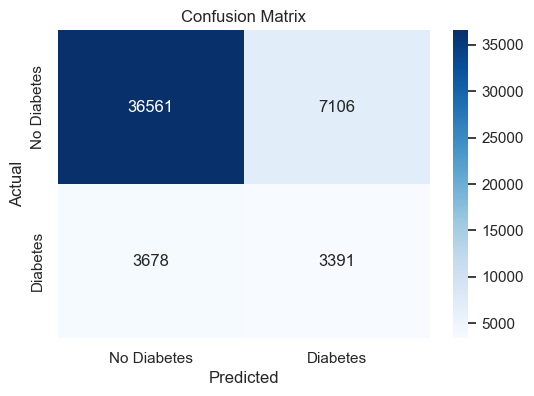

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### **Results of the Confusion Matrix**

1. **True Positives (TP):** 
   - **3,391**: Cases where the model correctly predicted "Diabetes."

2. **True Negatives (TN):**
   - **36,561**: Cases where the model correctly predicted "No Diabetes."

3. **False Positives (FP):**
   - **7,106**: Cases where the model incorrectly predicted "Diabetes" when it was actually "No Diabetes."

4. **False Negatives (FN):**
   - **3,678**: Cases where the model incorrectly predicted "No Diabetes" when it was actually "Diabetes."

---

### **Analysis**

1. **Performance on Class 0 (No Diabetes):**
   - The model performs well in identifying individuals without diabetes.
   - **High True Negatives (36,561):**
     - The majority of "No Diabetes" cases are correctly classified.
   - **Moderate False Positives (7,106):**
     - A significant number of "No Diabetes" cases are misclassified as "Diabetes."
     - This indicates a tendency toward overpredicting "Diabetes."

2. **Performance on Class 1 (Diabetes):**
   - The model has trouble with identifying diabetic individuals.
   - **Low True Positives (3,391):**
     - Only a portion of actual "Diabetes" cases are correctly identified.
   - **High False Negatives (3,678):**
     - Many individuals with diabetes are not correctly identified.

3. **Imbalanced Performance:**
   - The model is skewed toward predicting the majority class (No Diabetes).
   - Precision, recall, and F1-score for the minority class (Diabetes) will likely be low, which aligns with the poor performance metrics seen earlier.

### **Summary**

The confusion matrix highlights a significant challenge with identifying diabetic individuals (Class 1) due to class imbalance and model bias toward the majority class. 

### ROC Curve and AUC

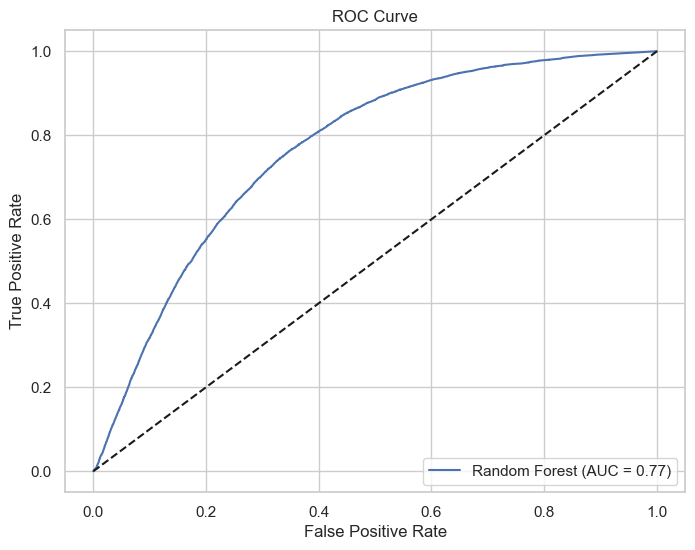

In [24]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### **Key Points About the ROC Curve:**

1. **AUC Score (Area Under the Curve):**
   - The AUC score is **0.77**, which indicates that the model has a moderate ability to distinguish between the two classes (diabetic vs. non-diabetic).

2. **True Positive Rate (TPR) vs. False Positive Rate (FPR):**
   - The curve shows the trade-off between the true positive rate (sensitivity or recall) and the false positive rate as the decision threshold is varied.
   - The model performs better than random guessing (diagonal dashed line), but there is significant room for improvement.

---

### Without SMOTE

Due to the suboptimal performance of the model when utilizing SMOTE, I conducted a comparative analysis by running the model without applying SMOTE. Surprisingly, the results without SMOTE demonstrated improved performance. The outcomes of this alternative approach are presented below.

In [26]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning using Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best Parameters
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [28]:
# Best estimator from Grid Search
best_rf_first = grid_search.best_estimator_

# Train the model
best_rf_first.fit(X_train, y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [29]:
# Predictions
y_pred = best_rf_first.predict(X_test)
y_pred_proba = best_rf_first.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Set Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.57      0.14      0.23      7069

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.83      0.87      0.83     50736



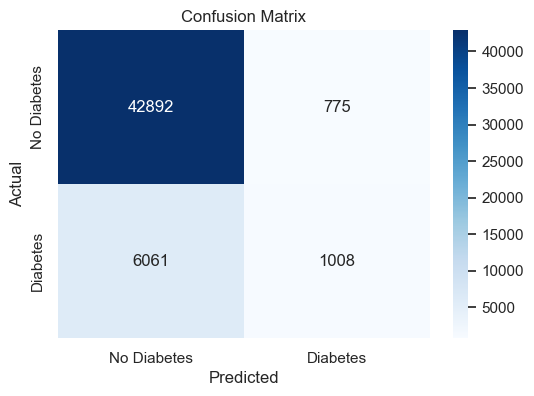

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  54.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  59.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.6min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  55.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 1.9min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  59.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; t

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


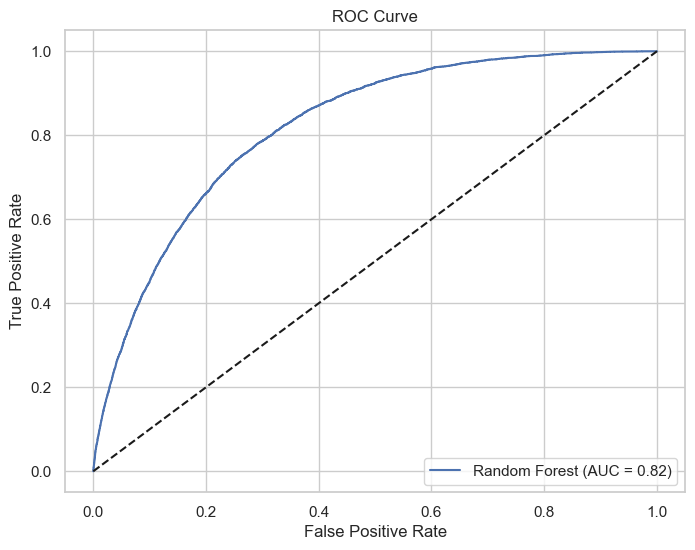

In [31]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


---

# Threshold Optimization


In [33]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Original Training Set Class Distribution:")
print(y_train.value_counts())
print("\nSMOTE Resampled Training Set Class Distribution:")
print(pd.Series(y_train_smote).value_counts())


Original Training Set Class Distribution:
0    174667
1     28277
Name: Diabetes_binary, dtype: int64

SMOTE Resampled Training Set Class Distribution:
0    174667
1    174667
Name: Diabetes_binary, dtype: int64


In [34]:
# Initialize Random Forest with balanced class weights
rf = RandomForestClassifier(random_state=42)

# Train the model on the SMOTE-resampled training data
rf.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set
y_pred_prob = rf.predict_proba(X_test)[:, 1]


Classification Report (Default Threshold 0.5):
              precision    recall  f1-score   support

           0       0.91      0.83      0.87     43667
           1       0.32      0.49      0.39      7069

    accuracy                           0.78     50736
   macro avg       0.61      0.66      0.63     50736
weighted avg       0.83      0.78      0.80     50736



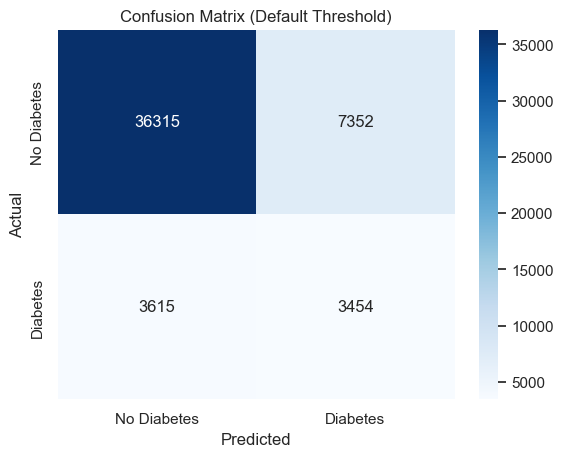

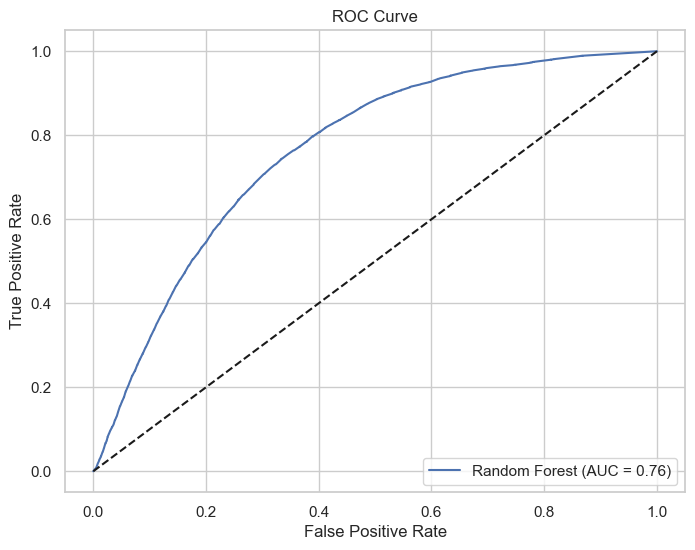

In [35]:
# Default Threshold Predictions
y_pred_default = (y_pred_prob >= 0.5).astype(int)

# Classification Report
print("Classification Report (Default Threshold 0.5):")
print(classification_report(y_test, y_pred_default))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_default)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix (Default Threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Optimal Threshold: 0.38

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.93      0.74      0.82     43667
           1       0.29      0.65      0.40      7069

    accuracy                           0.73     50736
   macro avg       0.61      0.69      0.61     50736
weighted avg       0.84      0.73      0.77     50736



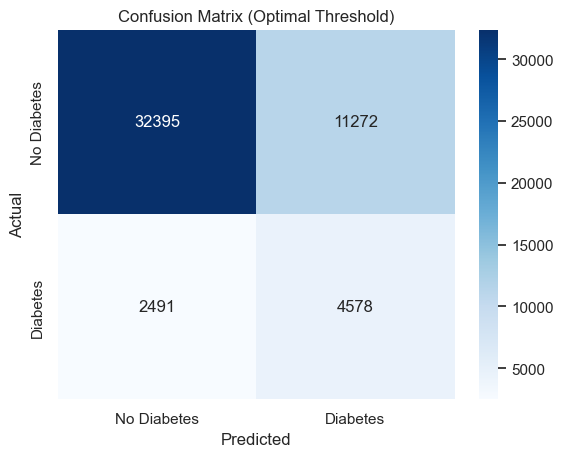

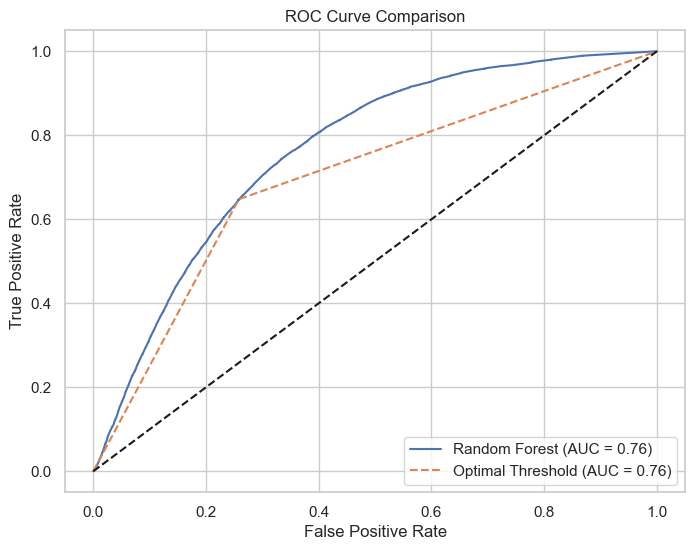

In [38]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# Calculate Precision, Recall, and Thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Identify the optimal threshold (maximize the F1-score or a similar trade-off metric)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Add small value to avoid division by zero
optimal_idx = np.argmax(f1_scores)  # Index of the best threshold
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

# Predictions with the optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# Evaluate Model with Optimal Threshold
print("\nClassification Report (Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))

# Confusion Matrix
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(cm_optimal, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title("Confusion Matrix (Optimal Threshold)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compare ROC Curve for Default and Optimal Thresholds
fpr_default, tpr_default, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr_default, tpr_default, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')

# Recalculate ROC with optimal threshold
optimal_fpr, optimal_tpr, _ = roc_curve(y_test, y_pred_optimal)
plt.plot(optimal_fpr, optimal_tpr, label=f"Optimal Threshold (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})", linestyle='--')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
